In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

READ DATA

In [2]:
df_test = pd.read_csv(r"/Users/howie/Desktop/STA 141C/Final Project/df_test.csv",index_col=0)
df_train = pd.read_csv(r"/Users/howie/Desktop/STA 141C/Final Project/df_train.csv",index_col=0)

In [3]:
df_train.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,1,0,0,1,0,0
2,1,1,1,1,3000,0.0,66.0,360.0,1.0,1,1,0,0,0,0,0,1
3,1,1,0,0,2583,2358.0,120.0,360.0,1.0,1,1,0,0,0,0,0,1
4,1,0,1,0,6000,0.0,141.0,360.0,1.0,1,1,0,0,0,0,0,1
5,1,1,1,1,5417,4196.0,267.0,360.0,1.0,1,0,0,1,0,0,0,1


In [4]:
df_test.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,1,1,0,5720,0,110.0,360.0,1.0,1,0,0,0,0,0,1
1,1,1,1,0,3076,1500,126.0,360.0,1.0,0,1,0,0,0,0,1
2,1,1,1,0,5000,1800,208.0,360.0,1.0,0,0,1,0,0,0,1
3,1,1,1,0,2340,2546,100.0,360.0,0.0,0,0,1,0,0,0,1
4,1,0,0,0,3276,0,78.0,360.0,1.0,1,0,0,0,0,0,1


In [5]:
df_train.shape, df_test.shape

((533, 17), (322, 16))

SET UP PARAMETERS

In [6]:
X = df_train.drop(columns = "Loan_Status") #drop the column 'Loan_Status'
Y = df_train["Loan_Status"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state= 0)

# normalize the independent variables
X_train = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis = 0)
X_test = (X_test - np.mean(X_test, axis=0)) / np.std(X_test, axis= 0 )

Logistic Regression Algorithm

In [8]:
from sklearn.base import BaseEstimator, ClassifierMixin

class LogisticRegression(BaseEstimator, ClassifierMixin):

        def __init__(self, learning_rate = 0.1, num_iterations = 1000):
                self.learning_rate = learning_rate
                self.num_iterations = num_iterations


        def sigmoid(self, z):
            return 1 / (1 + np.exp(-z))
        
        def initialize_weights(self, n_features):
              self.weights = np.zeros((n_features,))
              self.bias = 0

        def forward_propagation(self,X):
              linear_output = np.dot(X, self.weights) + self.bias
              y_pred = self.sigmoid(linear_output)
              return y_pred
        
        def backward_propagation(self, X, y_pred, y_true):
              n_samples = X.shape[0]
              dw = (1 / n_samples) * np.dot(X.T, (y_pred - y_true))
              db = (1 / n_samples) * np.sum(y_pred - y_true)
              return dw, db
              
        def update_weights(self, dw, db):
              self.weights = self.weights - self.learning_rate * dw
              self.bias = self.bias - self.learning_rate * db

        def fit(self,X,y):
            n_samples, n_features = X.shape
            self.initialize_weights(n_features)

            for i  in range(self.num_iterations):
                y_pred = self.forward_propagation(X)
                dw, db = self.backward_propagation(X, y_pred, y)
                self.update_weights(dw, db)

            return self

        def predict(self,X):
              y_pred = self.forward_propagation(X)
              y_pred_class = np.where(y_pred > 0.5, 1, 0)
              return y_pred_class
        
        def predict1(self,X):
              y_pred= self.forward_propagation(X)
              return y_pred
        
        def predict_proba(self, X):
              y_pred = self.forward_propagation(X)
              return np.column_stack((1 - y_pred, y_pred))


TESTING MODEL

In [9]:
log_reg = LogisticRegression(learning_rate=0.1, num_iterations=1000)
log_reg.fit(X = X_train, y = y_train)
log_fitted = log_reg.fit(X = X_train, y = y_train)

In [10]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
y_pred = log_reg.predict(X = X_test)
y_pred_prob = log_reg.predict1(X = X_test)
log_odds = np.log(y_pred_prob / (1 - y_pred_prob))
print("Accuracy:" ,metrics.accuracy_score(y_pred, y_test))

Accuracy: 0.85


In [11]:
y_pred_prob

array([0.87433682, 0.78281913, 0.40182499, 0.30427551, 0.59120429,
       0.80242478, 0.29200364, 0.73598007, 0.87372185, 0.769296  ,
       0.31238606, 0.68748935, 0.72325238, 0.78959915, 0.80768936,
       0.70703133, 0.89992628, 0.63579186, 0.29231   , 0.69458751,
       0.88855071, 0.69319515, 0.77758663, 0.34454672, 0.75208637,
       0.56281579, 0.83684378, 0.88767065, 0.28472926, 0.57612951,
       0.8596446 , 0.59849241, 0.54723351, 0.35973332, 0.53052881,
       0.86651313, 0.83228811, 0.7756167 , 0.79420246, 0.70622301,
       0.68799903, 0.75257621, 0.72688354, 0.54502041, 0.59659335,
       0.87394578, 0.86412833, 0.87682853, 0.47797636, 0.85163513,
       0.32634799, 0.69932479, 0.87976876, 0.72608441, 0.77854343,
       0.37934153, 0.8676089 , 0.80598001, 0.18031405, 0.65924462,
       0.64500663, 0.70683237, 0.62821181, 0.89075756, 0.777693  ,
       0.30635491, 0.54377996, 0.79973795, 0.18496229, 0.60275285,
       0.44413391, 0.80334348, 0.83587883, 0.79773115, 0.70136

In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.59      0.65        37
           1       0.88      0.93      0.90       123

    accuracy                           0.85       160
   macro avg       0.80      0.76      0.78       160
weighted avg       0.84      0.85      0.85       160



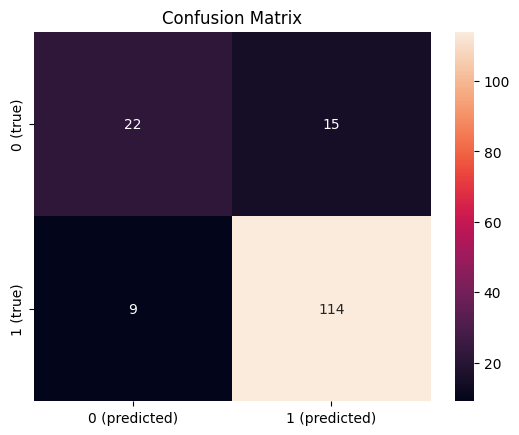

In [13]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot = True, fmt= 'g', ax=ax)
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(['0 (predicted)', '1 (predicted)']) 
ax.yaxis.set_ticklabels(['0 (true)', '1 (true)'])
plt.show()

# From the confusion matrix, we can see there are 114 true postive, 22 true negative, 9 false positive, 15 false negative

Model Assumptions Testing

Testing model assumption of Lienarity using Partial Depedence Plot

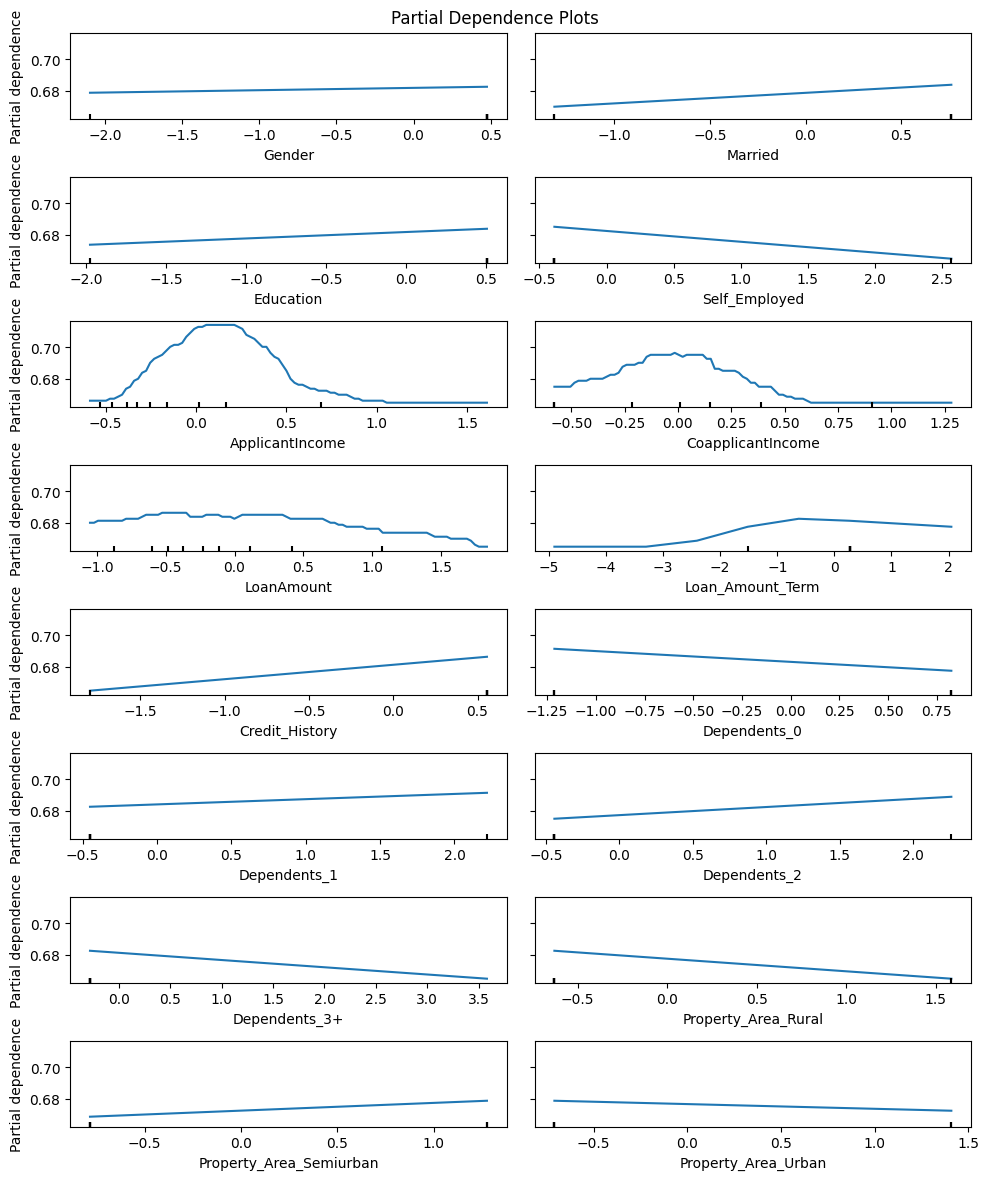

In [14]:
import warnings
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.compose import TransformedTargetRegressor
from sklearn.inspection import PartialDependenceDisplay 

# turn off warnings
warnings.filterwarnings('ignore') #ignore the warnings


# ensure the model output is an estimator
estimator = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2),
    TransformedTargetRegressor(regressor=LogisticRegression(), transformer=StandardScaler())
)

estimator.fit(X = X_train, y = y_train)

# dis-normalize the training data (does not affect anything, but the numbers will look nice)
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state= 0)

# Create partial residual plots for each independent variable
fig, ax = plt.subplots(8, 2, figsize=(10, 12))
PartialDependenceDisplay.from_estimator(estimator, X_train, X_train.columns, ax = ax)

# Displat the partial residual plots
fig.suptitle('Partial Dependence Plots')
fig.tight_layout()

# variables shown significant linearity 

Check the model assumption of independence/multicollinearity

In [15]:
# Create a correlation matrix of the independent variables
corr_matrix = X.corr()

# Display the correlation matrix
print(corr_matrix)

# there is no significant pair-wise correlation found

                           Gender   Married  Education  Self_Employed  \
Gender                   1.000000  0.355939  -0.070404      -0.008141   
Married                  0.355939  1.000000  -0.024687      -0.007592   
Education               -0.070404 -0.024687   1.000000      -0.005144   
Self_Employed           -0.008141 -0.007592  -0.005144       1.000000   
ApplicantIncome          0.042462  0.031231   0.133683       0.169095   
CoapplicantIncome        0.161109  0.116510   0.075490      -0.019248   
LoanAmount               0.110504  0.163519   0.166975       0.133815   
Loan_Amount_Term        -0.088570 -0.107981   0.081819      -0.034642   
Credit_History           0.038542  0.000410   0.085538      -0.011023   
Dependents_0            -0.188254 -0.381249   0.037913      -0.080936   
Dependents_1             0.007083  0.128750   0.003048       0.068079   
Dependents_2             0.151008  0.257511  -0.018685       0.036788   
Dependents_3+            0.122822  0.158103  -0.047

Simulation Testing (threshold change to 0.6)

In [16]:
simu_data = pd.read_csv(r"/Users/howie/Desktop/STA 141C/Final Project/Simulation_data.csv",index_col=0)
X_simu = simu_data.drop(columns = "Loan_Status") #drop the column 'Loan_Status'
Y_simu = simu_data["Loan_Status"]

X_train_simu, X_test_simu, y_train_simu, y_test_simu = train_test_split(X_simu, Y_simu, test_size=0.5, random_state= 0)

# normalize the independent variables
X_train_simu = (X_train_simu - np.mean(X_train_simu, axis=0)) / np.std(X_train_simu, axis = 0)
X_test_simu = (X_test_simu - np.mean(X_test_simu, axis=0)) / np.std(X_test_simu, axis= 0 ) 

In [17]:
log_reg = LogisticRegression(learning_rate=0.1, num_iterations=1000)
log_reg.fit(X = X_train_simu, y = y_train_simu)
log_fitted = log_reg.fit(X = X_train_simu, y = y_train_simu)

In [18]:
y_pred = log_reg.predict(X = X_test_simu)
y_pred_prob = log_reg.predict1(X = X_test_simu)
log_odds = np.log(y_pred_prob / (1 - y_pred_prob))
print("Accuracy:" ,metrics.accuracy_score(y_pred, y_test_simu))

Accuracy: 0.7196


In [19]:
print(y_pred_prob)

[0.72021712 0.72418301 0.6168348  ... 0.69468923 0.70763345 0.59571889]


In [20]:
print(classification_report(y_test_simu, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       701
           1       0.72      1.00      0.84      1799

    accuracy                           0.72      2500
   macro avg       0.36      0.50      0.42      2500
weighted avg       0.52      0.72      0.60      2500



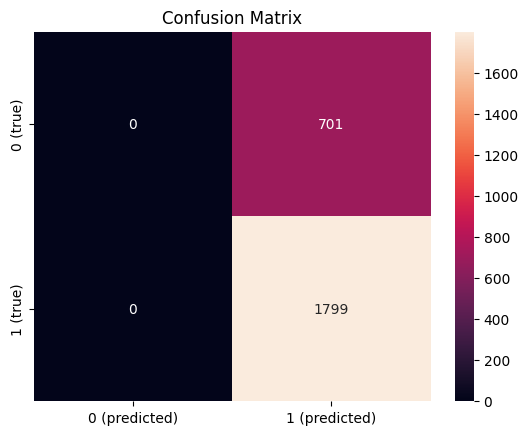

In [21]:
#Confusion Matrix
cm = confusion_matrix(y_test_simu, y_pred)
ax = plt.subplot()
sns.heatmap(cm, annot = True, fmt= 'g', ax=ax)
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(['0 (predicted)', '1 (predicted)']) 
ax.yaxis.set_ticklabels(['0 (true)', '1 (true)'])
plt.show()

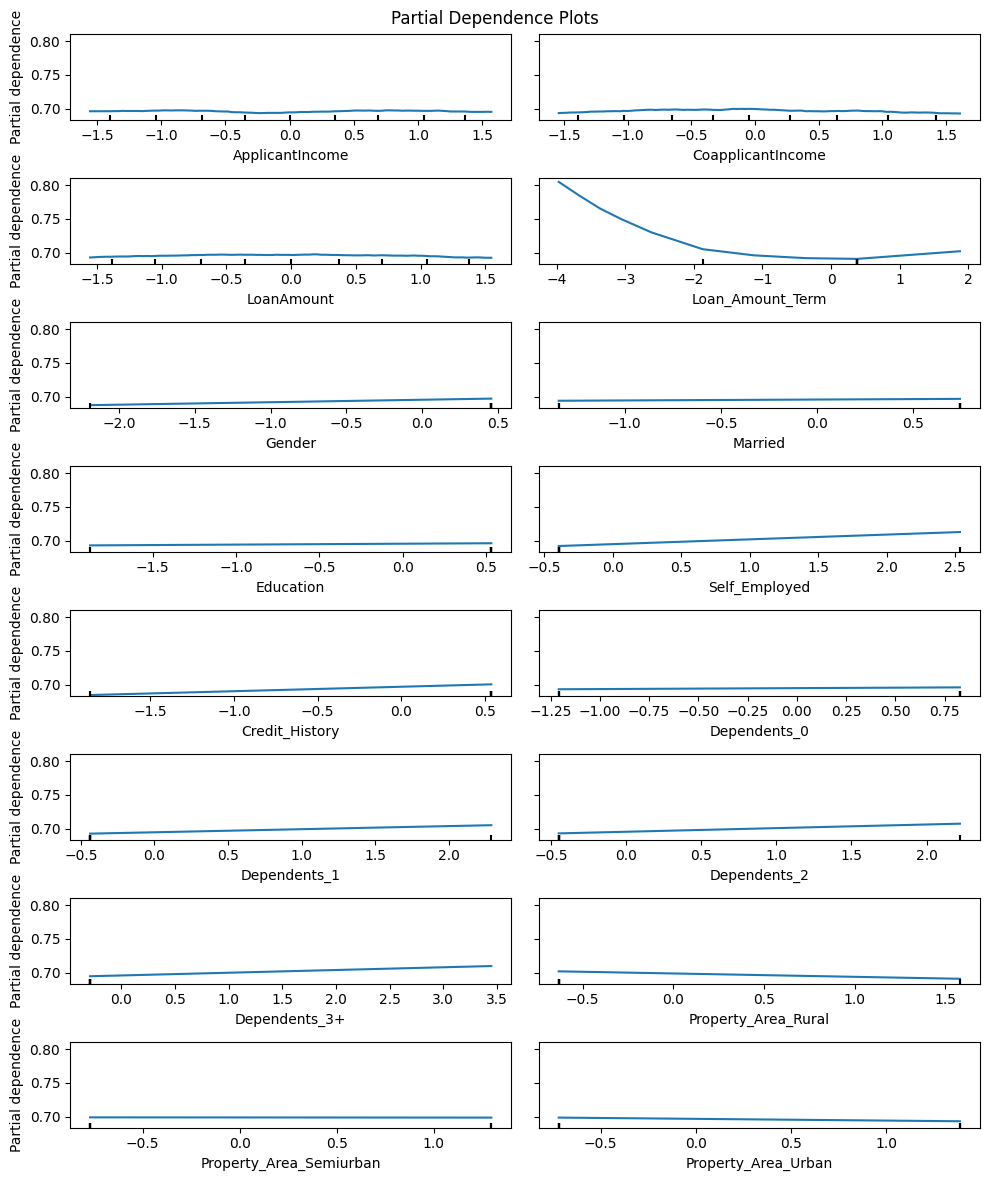

In [22]:
# ensure the model output is an estimator
estimator = make_pipeline(
    StandardScaler(),
    PolynomialFeatures(degree=2),
    TransformedTargetRegressor(regressor=LogisticRegression(), transformer=StandardScaler())
)

estimator.fit(X = X_train_simu, y = y_train_simu)

# dis-normalize the training data (does not affect anything, but the numbers will look nice)
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state= 0)

# Create partial residual plots for each independent variable
fig, ax = plt.subplots(8, 2, figsize=(10, 12))
PartialDependenceDisplay.from_estimator(estimator, X_train_simu, X_train_simu.columns, ax = ax)

# Displat the partial residual plots
fig.suptitle('Partial Dependence Plots')
fig.tight_layout()

In [23]:
# Create a correlation matrix of the independent variables
corr_matrix = X_simu.corr()

# Display the correlation matrix
print(corr_matrix)

# there is no significant pair-wise correlation found

                         ApplicantIncome  CoapplicantIncome  LoanAmount  \
ApplicantIncome                 1.000000          -0.007017   -0.009517   
CoapplicantIncome              -0.007017           1.000000   -0.022831   
LoanAmount                     -0.009517          -0.022831    1.000000   
Loan_Amount_Term               -0.004339          -0.004278    0.004953   
Gender                         -0.011935           0.028321   -0.020562   
Married                        -0.006588          -0.016816    0.025820   
Education                      -0.003022           0.007452    0.006484   
Self_Employed                  -0.014685          -0.000452   -0.017852   
Credit_History                  0.003983          -0.001378   -0.015770   
Dependents_0                    0.011769           0.014491    0.011112   
Dependents_1                   -0.012112          -0.001184    0.000459   
Dependents_2                   -0.007592          -0.002499   -0.003183   
Dependents_3+            